In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
print(train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
X_train = train.drop('label', axis = 1)
y_train = train['label']
print(y_train.value_counts())

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [5]:
print('x_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape[0])
print('test shape: ', test.shape)
print('\nsamples in test: ', test.shape[0])
print('samples in train: ', X_train.shape[0])

x_train shape:  (42000, 784)
y_train shape:  42000
test shape:  (28000, 784)

samples in test:  28000
samples in train:  42000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

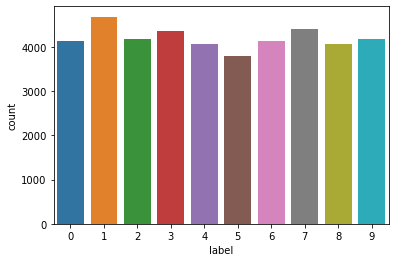

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y_train)

In [7]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
test = test.values.reshape(test.shape[0], 28, 28, 1)

In [8]:
print('x_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('test shape: ', test.shape)

x_train shape:  (42000, 28, 28, 1)
y_train shape:  (42000,)
test shape:  (28000, 28, 28, 1)


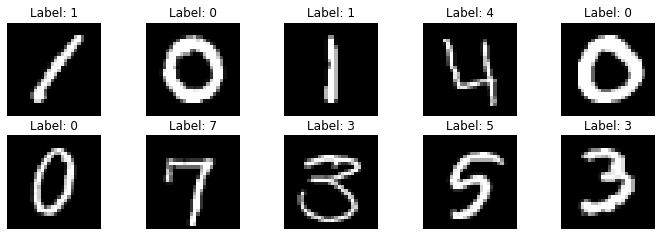

In [9]:
plt.figure(figsize=(12,10))
for img in range(10):
    plt.subplot(5, 5, img+1)
    plt.imshow(X_train[img].reshape((28, 28)), cmap='binary_r')
    plt.axis('off')
    plt.title('Label: ' + y_train[img].astype('str'))
plt.show()

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state=1)

In [12]:
import tensorflow as tf

In [13]:
cnn = tf.keras.models.Sequential()

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

In [15]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [20]:
cnn.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
cnn.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25)

Epoch 1/25
1182/1182 [==============================] - 19s 15ms/step - loss: 27.4586 - accuracy: 0.0759 - val_loss: 11.7289 - val_accuracy: 0.1543
Epoch 2/25
1182/1182 [==============================] - 17s 15ms/step - loss: 10.2401 - accuracy: 0.1944 - val_loss: 7.0855 - val_accuracy: 0.3098
Epoch 3/25
1182/1182 [==============================] - 18s 15ms/step - loss: 6.4438 - accuracy: 0.3447 - val_loss: 4.8810 - val_accuracy: 0.4405
Epoch 4/25
1182/1182 [==============================] - 17s 15ms/step - loss: 4.6205 - accuracy: 0.4599 - val_loss: 3.6692 - val_accuracy: 0.5383
Epoch 5/25
1182/1182 [==============================] - 18s 15ms/step - loss: 3.3703 - accuracy: 0.5522 - val_loss: 2.9178 - val_accuracy: 0.6007
Epoch 6/25
1182/1182 [==============================] - 18s 15ms/step - loss: 2.7480 - accuracy: 0.6152 - val_loss: 2.4185 - val_accuracy: 0.6402
Epoch 7/25
1182/1182 [==============================] - 18s 15ms/step - loss: 2.3399 - accuracy: 0.6577 - val_loss: 2.069

In [22]:
loss, accuracy = cnn.evaluate(X_test, y_test, verbose=0)
train_stat = cnn.evaluate(X_train, y_train, verbose=0)
print('Train Loss:     ', round(train_stat[0], 5))
print('Train Accuracy: ', round(train_stat[1]*100, 4), '%')
print('Test Loss:      ', round(loss, 5))
print('Test Accuracy:  ', round(accuracy*100, 4), '%')

Train Loss:      0.68483
Train Accuracy:  87.0053 %
Test Loss:       0.71686
Test Accuracy:   86.5714 %


In [23]:
predictions = cnn.predict(np.array(test.reshape(28000,28,28,1)))

In [24]:
output = []

for i in range(len(predictions)):
    j = -1
    max_i = -1
    out = 0
    for num in predictions[i]:
        j += 1
        if num > max_i:
            max_i = num
            out = j
            
    output.append(out)
        

In [25]:
print(output[5])

7


In [26]:
outputDict = {"ImageId":np.arange(1,28001)}
submissions = pd.DataFrame(outputDict)
submissions["Label"] = output
submissions.to_csv("submission.csv", index=False, header=True)
